# 2. Model builing using cleaned Credit Risk Data
-------------------
FSDS Machine Learning Workshop , October 16, 2022

> <i>Description: Applying the random forest on cleaned data and deploying the model</i>


### Pre requisites: 
1. Make sure the user has all the data science packages installed


Input Files:
- cleaned_dataset.csv

Output File: 
- rf_model.pkl




## 1. Import Required Packages 

In [72]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import pickle
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2. Data analysis before model building

In [75]:
df = pd.read_csv("cleaned_dataset.csv")

In [76]:
df.head()

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
0,0.59,3,59000,0,16.02,1
1,0.10,1,9600,2,11.14,0
2,0.57,2,9600,1,12.87,1
3,0.53,2,65500,0,15.23,1
4,0.55,2,54400,0,14.27,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28514 entries, 0 to 28513
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_percent_income    28514 non-null  float64
 1   loan_grade             28514 non-null  int64  
 2   person_income          28514 non-null  int64  
 3   person_home_ownership  28514 non-null  int64  
 4   loan_int_rate          28514 non-null  float64
 5   loan_status            28514 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 MB


In [78]:
# Pandas sample() is used to generate a sample random row or column from the function caller data frame
df.sample(5)

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
17493,0.20,0,58800,0,11.077177,0
22870,0.19,2,80300,1,12.730000,0
2730,0.34,1,34000,1,10.990000,0
14677,0.13,2,120000,1,14.650000,0
20317,0.42,3,17280,0,12.360000,1


### Loan Status pie chart

Refer: https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/ for more information on how to create more elegant pie charts

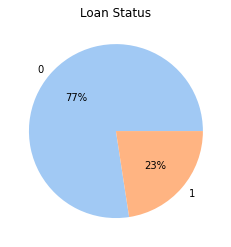

In [79]:
#create pie chart
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]
labels= df['loan_status'].value_counts().index

plt.pie(df['loan_status'].value_counts(),labels = labels, colors=colors,  autopct='%.0f%%')
plt.title('Loan Status')
plt.show();

### Loan interest rate  Disturbution

In [93]:
fig = px.histogram(df.loan_int_rate)
fig.show()

## 3. Model Training

### 3.1 Prepare data for training

In [81]:
# separating our features and target varibale 
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']    

### 3.2 Train and test split

In [82]:
# Dividing the dataset into 2 dataframe.
# One data frame called Train will have 75 % of parent records and rest on another called test datframe 
# using stratify split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62, stratify=y)

In [83]:
# Printing the train and test dataframe dimensions
print("Target Training Data Shape:" , y_train.shape)
print("Target Test Data Shape:" , y_test.shape)
print("Variables Training Data Shape:" , X_train.shape)
print("Variable Test Data Shape:" , X_test.shape)

Target Training Data Shape: (21385,)
Target Test Data Shape: (7129,)
Variables Training Data Shape: (21385, 5)
Variable Test Data Shape: (7129, 5)


### 3.3 Loading the model

In [84]:
# intialising the random forest model from sklearn library
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# in case if you curious how to hyperparameter tune : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10, n_estimators = 1000, random_state = 1)

In [85]:
# Fitting the model on Train Data
rf_model = forest.fit(X_train, y_train)

In [86]:
# Making predictions

pred = rf_model.predict(X_test)

### 3.4 Feature importance 
ref: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e


In [87]:
Final_df = pd.DataFrame()

In [88]:
Final_df['columns']=  X_train.columns
Final_df['featrue_importance']=my_forest.feature_importances_

In [89]:
Final_df.sort_values('featrue_importance', ascending=False)['columns'].head().values

array(['loan_percent_income', 'loan_grade', 'person_income',
       'person_home_ownership', 'loan_int_rate'], dtype=object)

### 3.5 Checking the model quality 

Ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    

In [91]:
#Train Metrics
generate_model_report(y_test, pred)

Accuracy =  0.8933931827745827
Precision =  0.8324197337509789
Recall =  0.6606587942821628
F1 Score =  0.7366597366597366


## 4. Exporting the Model

By the pickling a file we are saving the model object in file and later this file can be used other machines as well
- Ref: https://towardsdatascience.com/do-not-use-python-pickle-unless-you-know-all-these-facts-d9e8695b7d43

In [92]:

with open('rf_model.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(rf_model, f) 